In [1]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

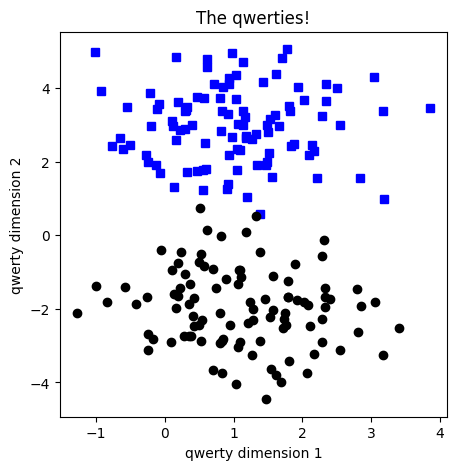

In [2]:
# create data
nPerClust = 100
blur = 1

A = [  1, 3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
#  model
def model_function(learning_rate):
        model = nn.Sequential(
                nn.Linear(2,64), # input layer
                nn.ReLU(), # activation function
                nn.Linear(64,1), # hidden unit
                nn.ReLU(), # activation function
                nn.Linear(1,1), # output unit
                nn.Sigmoid() # final activation function
        )
        lossfn = nn.BCELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        return model, lossfn, optimizer

In [4]:
epochs = 1000

def train(x, nn, lossfn, opt):
    losses = torch.zeros(epochs)

    for i in range(epochs):
        # forward pass
        yhat = nn(x)

        # compute loss
        loss = lossfn(yhat, labels)
        losses[i] = loss
        
        # backprop
        opt.zero_grad()
        loss.backward()
        opt.step()

    # final forward pass
    preds = nn(x)
    accuracy = 100*torch.mean(((preds>0.5)==labels).float())

    return losses, preds, accuracy

In [5]:
model, loss_function, optimizer = model_function(0.01)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=1, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)


In [6]:
losses, preds, accuracy = train(data, model, loss_function, optimizer)
print(accuracy)

tensor(99.)


(Text(0.5, 0, 'epochs'), Text(0, 0.5, 'loss'))

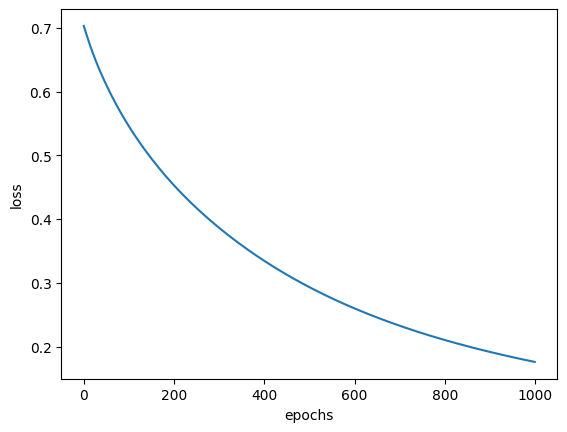

In [7]:
plt.plot(losses.detach())
plt.xlabel('epochs'), plt.ylabel('loss')

# Conducting the experiment

In [8]:
learningrates = np.linspace(0.001, 0.1, 50)
accuracybylr = []
alllosses = np.zeros((len(learningrates), epochs))

for i, j in enumerate(learningrates):
    model, loss_function, optimizer = model_function(j)
    losses, preds, accuracy = train(data, model, loss_function, optimizer)

    accuracybylr.append(accuracy)
    alllosses[i,:] = losses.detach()

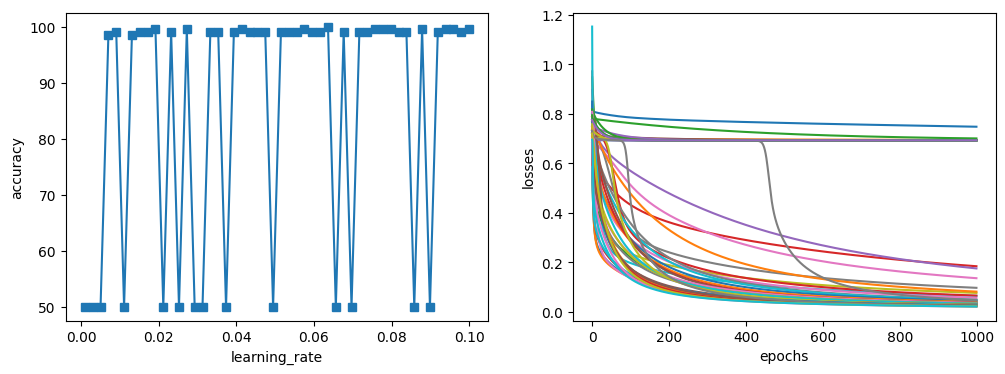

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(learningrates, accuracybylr, 's-')
ax[0].set_xlabel('learning_rate')
ax[0].set_ylabel('accuracy')
ax[1].plot(alllosses.T)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('losses')
plt.show()

In [10]:
accuracybylr

[tensor(50.),
 tensor(50.),
 tensor(50.),
 tensor(98.5000),
 tensor(99.),
 tensor(50.),
 tensor(98.5000),
 tensor(99.),
 tensor(99.),
 tensor(99.5000),
 tensor(50.),
 tensor(99.),
 tensor(50.),
 tensor(99.5000),
 tensor(50.),
 tensor(50.),
 tensor(99.),
 tensor(99.),
 tensor(50.),
 tensor(99.),
 tensor(99.5000),
 tensor(99.),
 tensor(99.),
 tensor(99.),
 tensor(50.),
 tensor(99.),
 tensor(99.),
 tensor(99.),
 tensor(99.5000),
 tensor(99.),
 tensor(99.),
 tensor(100.),
 tensor(50.),
 tensor(99.),
 tensor(50.),
 tensor(99.),
 tensor(99.),
 tensor(99.5000),
 tensor(99.5000),
 tensor(99.5000),
 tensor(99.),
 tensor(99.),
 tensor(50.),
 tensor(99.5000),
 tensor(50.),
 tensor(99.),
 tensor(99.5000),
 tensor(99.5000),
 tensor(99.),
 tensor(99.5000)]